<a href="https://colab.research.google.com/github/daj10/bank-marketing/blob/main/bank_marketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Methodes appliquées
###### Reduction de dimensions (ACP)
##### Classification : Regression logistique,  Naives Bayes,  ANN: Perceptron, Decision tree, KNN

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Importation des librairies

In [8]:
import matplotlib.pyplot as plt # visualiser des données sous formes de graphiques
import numpy as np # manipuler des matrices ou tableaux 
import pandas as pd # analyse, nettoyage et préparation des données
import seaborn as sns # création de tracés statistiques communs
import sklearn # librairie apprenissage automatique

## Lire dataset

In [9]:
#data = pd.read_csv("bank.csv")
data = pd.read_csv('/content/drive/My Drive/Bank_Marketing_FD/bank.csv')

In [10]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


## Analyse Exploratoire

In [11]:
def Exploration(data):
    '''
    fonction pour afficher la taille, le nombre de lignes et colonnes, Les variables manquantes
    input: dataframe
    ouput: 
    
    '''
    i = 0 # compteur no
    # taille dataset
    data_size = data.shape
    print("Le nombre de lignes: {}".format(data_size[0]))
    print("Le nombre de variables: {}".format(data_size[1]))
    print("-------------------------------------------------------")
    
    # les variables de notre jeu de donnees
    data_col = data.columns
    print("les variables du jeu de donnees:")
    for idx, val in enumerate (data.columns):
        print(idx+1, val)
    
    # Les valeurs manquantes
    if data.isnull().values.any() is not None:
        print("Pas de valeurs manquantes dans notre jeu de données")
    else:
        print(data.isnull().sum())
    print("-------------------------------------------------------")
    
    # lignes dupliquées
    if data.duplicated() is not None:
        print("Pas de valeurs doubles dans notre jeu de données")
    else:
        print('nombre de lignes dupliquées : {a}'.format(a=data.duplicated().sum()))
    
Exploration(data)

Le nombre de lignes: 11162
Le nombre de variables: 17
-------------------------------------------------------
les variables du jeu de donnees:
1 age
2 job
3 marital
4 education
5 default
6 balance
7 housing
8 loan
9 contact
10 day
11 month
12 duration
13 campaign
14 pdays
15 previous
16 poutcome
17 deposit
Pas de valeurs manquantes dans notre jeu de données
-------------------------------------------------------
Pas de valeurs doubles dans notre jeu de données


## Les types de variables

In [12]:
def Type_variables(data):
    '''
    Fonction qui renvoit les types de variable de notre jeu de données
    '''
    # type de variable
    types = ['int', 'object']
    for typ in types:
        if typ == 'int':
            print("Les variables numeriques")
        else:
            print('------------------------')
            print("Les variables categorielles")
            
        for colonne in data.select_dtypes(include=typ).columns:
            print(colonne)
            #if typ == 'object':
                #print(data[colonne].unique())
Type_variables(data)

Les variables numeriques
age
balance
day
duration
campaign
pdays
previous
------------------------
Les variables categorielles
job
marital
education
default
housing
loan
contact
month
poutcome
deposit


## Indicateurs statistiques

### Les variables numeriques

In [13]:
data.describe(include=[np.number])

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


### Les variables categorielles

In [14]:
data.describe(include=[np.object])

,job,marital,education,default,housing,loan,contact,month,poutcome,deposit
count,11162,11162,11162,11162,11162,11162,11162,11162,11162,11162
unique,12,3,4,2,2,2,3,12,4,2
top,management,married,secondary,no,no,no,cellular,may,unknown,no
freq,2566,6351,5476,10994,5881,9702,8042,2824,8326,5873


## Data Vizualisation

### Les variables categorielles

In [15]:
def categorial_vizualisation(variable):
    '''
    Fonction pour visualiser la repartition des variables qualitatives
    '''
    var =data[variable]
    varValue = var.value_counts()
    plt.figure(figsize=(15,3))
    plt.bar(varValue.index, varValue,color=['#00008b','#00e5ee','#cd1076', '#008080','#cd5555','red','blue',])
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    
    plt.show()
    print("{}: \n {}".format(variable,varValue))

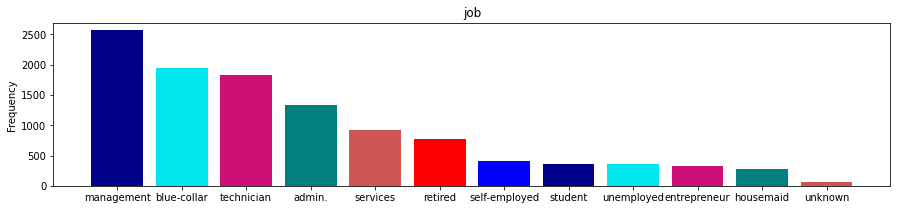

job: 
 management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64


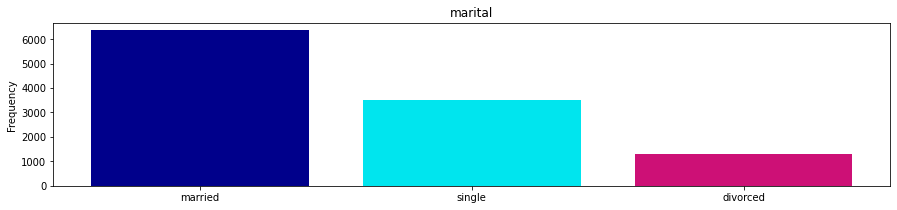

marital: 
 married     6351
single      3518
divorced    1293
Name: marital, dtype: int64


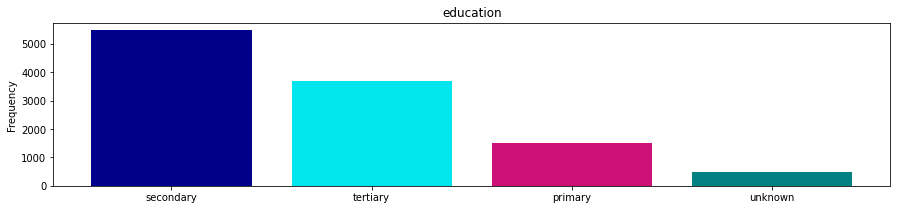

education: 
 secondary    5476
tertiary     3689
primary      1500
unknown       497
Name: education, dtype: int64


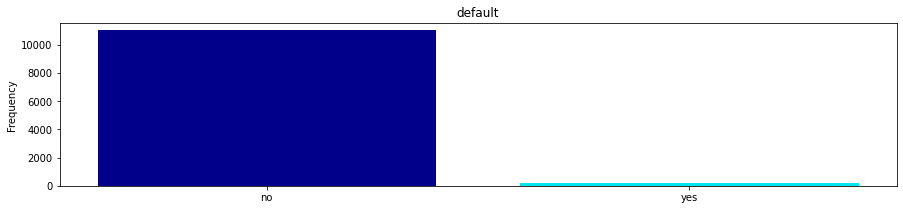

default: 
 no     10994
yes      168
Name: default, dtype: int64


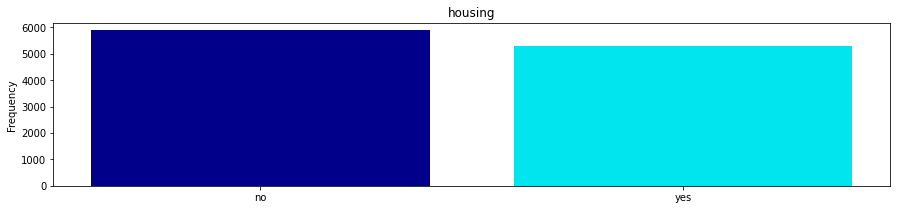

housing: 
 no     5881
yes    5281
Name: housing, dtype: int64


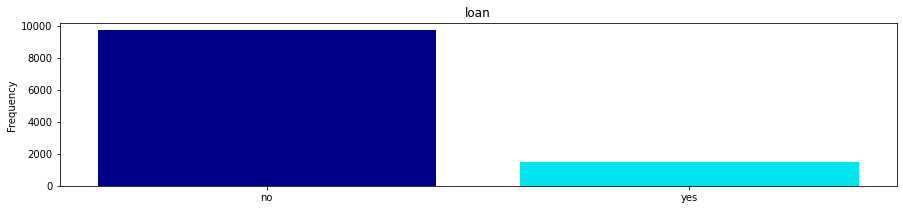

loan: 
 no     9702
yes    1460
Name: loan, dtype: int64


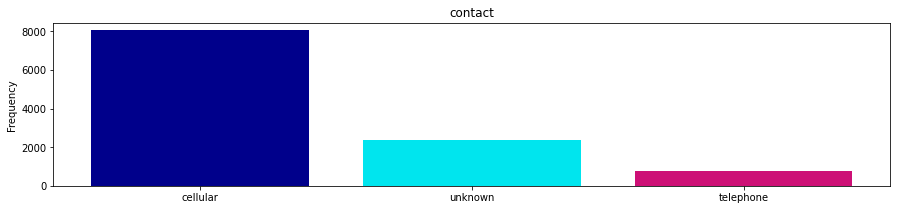

contact: 
 cellular     8042
unknown      2346
telephone     774
Name: contact, dtype: int64


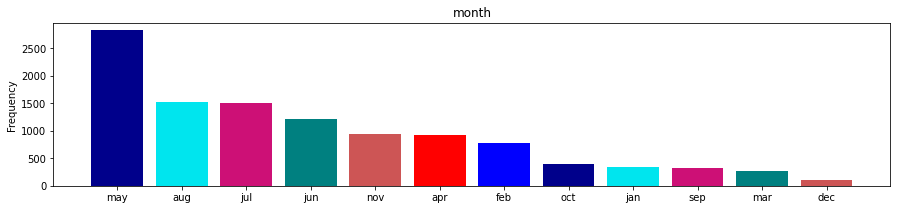

month: 
 may    2824
aug    1519
jul    1514
jun    1222
nov     943
apr     923
feb     776
oct     392
jan     344
sep     319
mar     276
dec     110
Name: month, dtype: int64


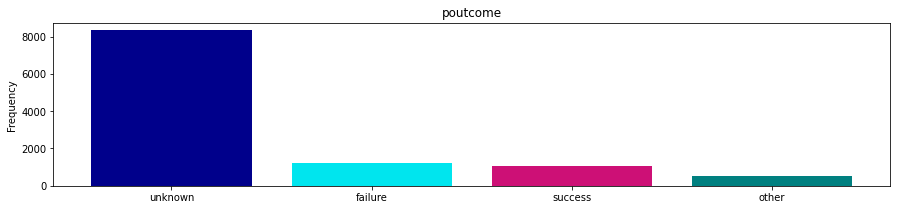

poutcome: 
 unknown    8326
failure    1228
success    1071
other       537
Name: poutcome, dtype: int64


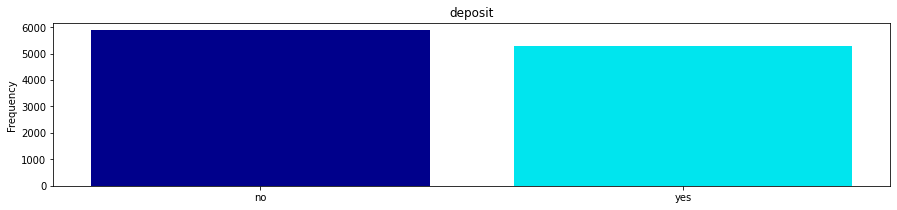

deposit: 
 no     5873
yes    5289
Name: deposit, dtype: int64


In [16]:
var_cate = data.select_dtypes(include=['object'])
#var_cate = ["job","marital","education", "housing", "loan","contact","poutcome","month","deposit"]
for c in var_cate:
    categorial_vizualisation(c)

### Les variables quantitatives

In [17]:
def numerique_vizualisation(var):
    '''
    Fonction pour visualiser les variables quantitatifs
    '''
    nouvelle_figure = plt.figure(figsize=(18,6))
    axe1 = plt.subplot(121)
    axe2 = plt.subplot(122)
    axe1.hist(data[var], color='blue') #,bins=10
    axe2.boxplot(data[var])

    axe1.set_title('Histogramme')
    axe2.set_title(' boite à moustache')
    axe1.set_xlabel(var)
    axe1.set_ylabel('effectif')
    axe2.set_xlabel(var)
    plt.grid(False)
    # Enregistrer l'image
    #plt.savefig('balance')
    plt.show()

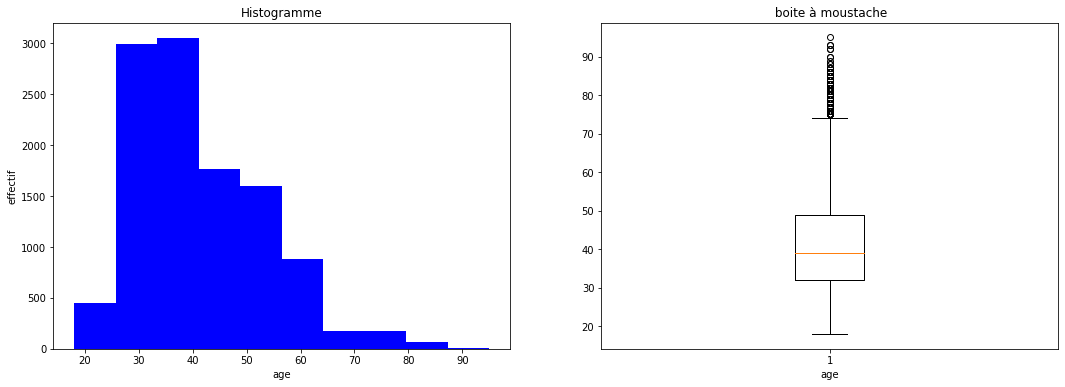

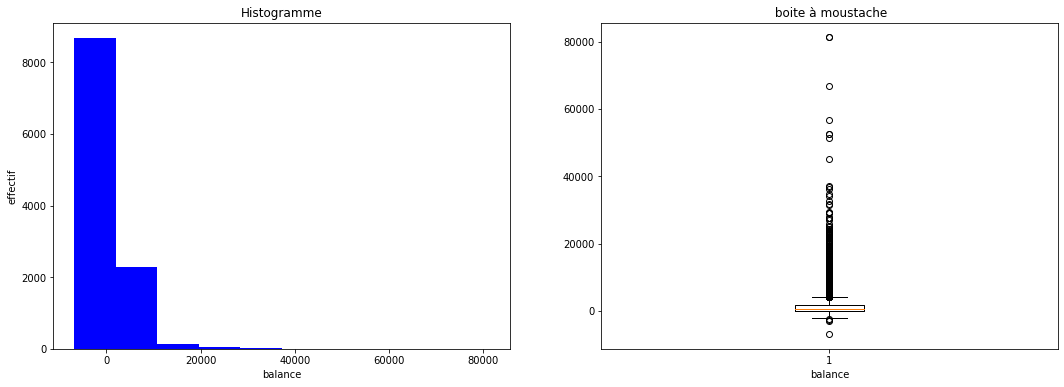

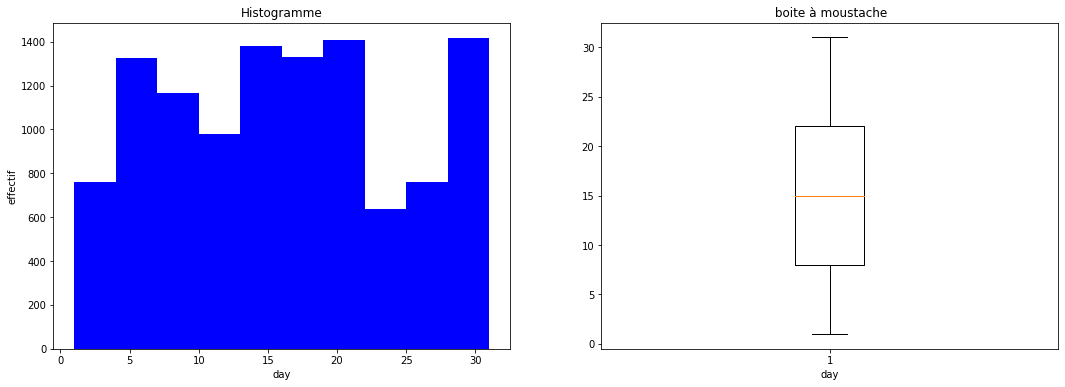

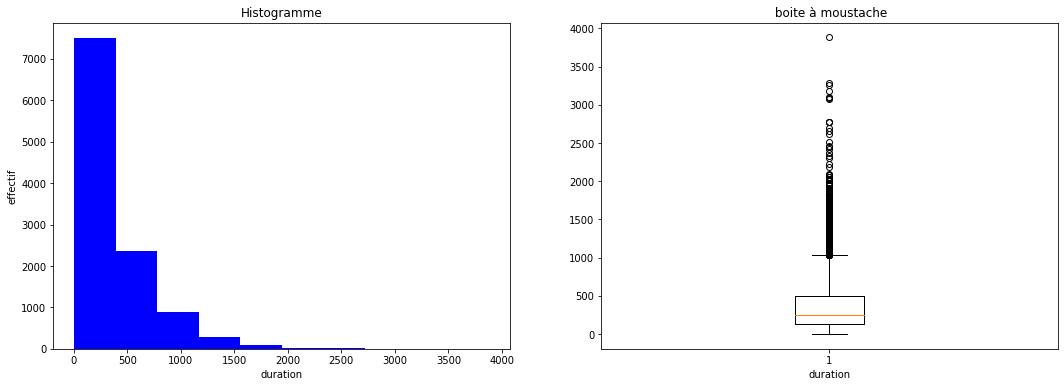

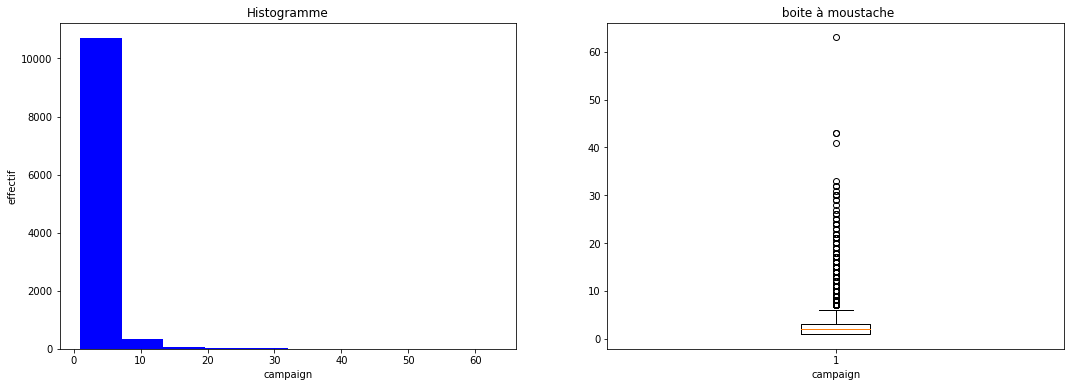

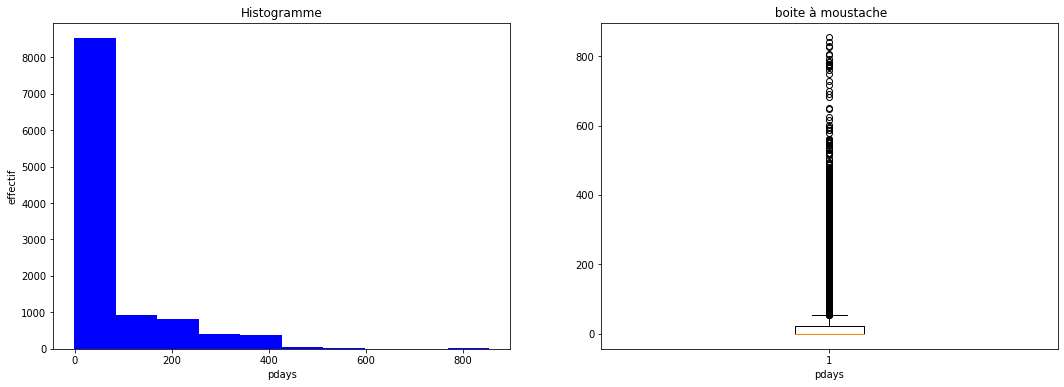

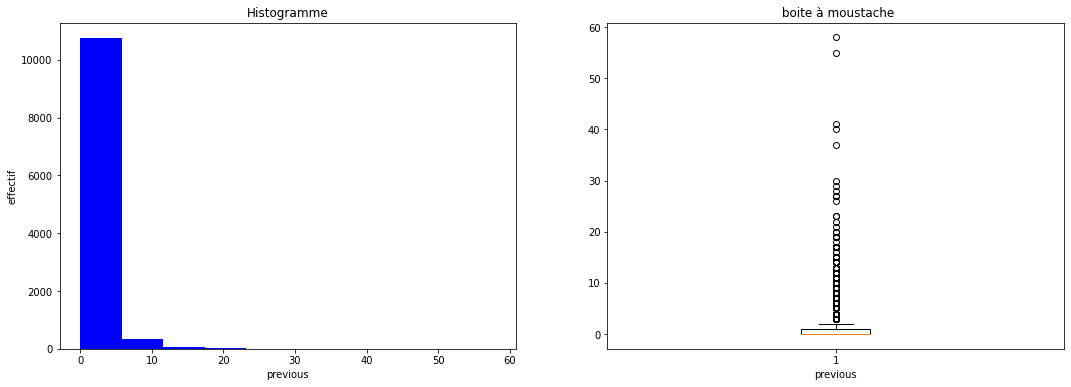

In [18]:
var_num = data.select_dtypes(include=['int'])
for i in var_num:
    numerique_vizualisation(i)

### Variation de la Variable Y

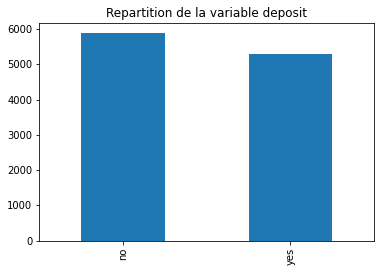

In [19]:
#Analyse de la colonne des réponses
value_counts = data['deposit'].value_counts()

value_counts.plot.bar(title = 'Repartition de la variable deposit')
#plt.savefig('y')

### Variation de Y en fonction des autres variables categorielles

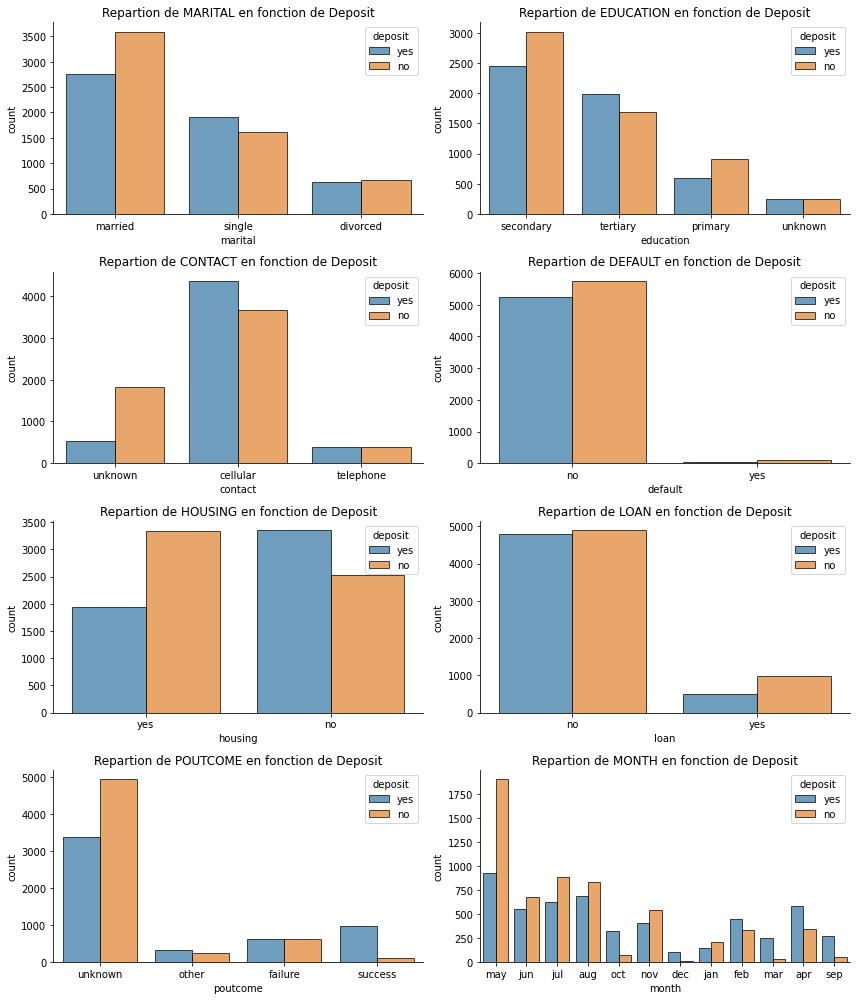

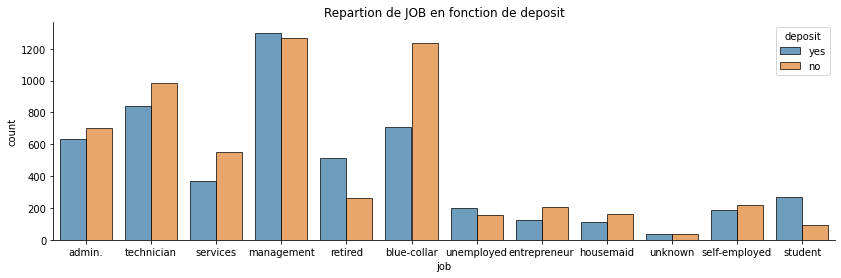

In [20]:
plt.figure(figsize=[12,14])
var_cate = ["marital", "education", "contact", "default", "housing", "loan", "poutcome", "month"]
i=1
for var in var_cate:
    plt.subplot(4,2,i)
    sns.countplot(x=var, hue='deposit', edgecolor="black", alpha=0.7, data=data)
    sns.despine()
    plt.title("Repartion de {} en fonction de Deposit".format(var.upper()))
    i=i+1
plt.tight_layout()
plt.show()

plt.figure(figsize=[14,4])
sns.countplot(x='job', hue='deposit',edgecolor="black", alpha=0.7, data=data)
sns.despine()
plt.title("Repartion de JOB en fonction de deposit")
plt.show()

## Correlation entre les variables

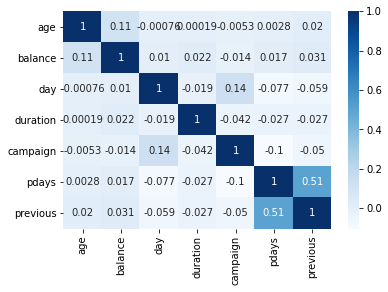

In [21]:
sns.heatmap(data.corr(method='pearson'), annot=True, cmap='Blues')

## Analyse des composants principales: ACP

In [22]:
from sklearn.decomposition import PCA # ACP
from sklearn.preprocessing import StandardScaler #classe pour standardisation

Text(0, 0.5, 'Variance cumulative expliquée')

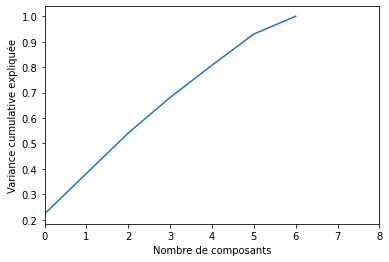

In [23]:
# Variables quantitatifs
data_acp = data.select_dtypes(include="int")
#print(data_acp)

# Instanciation pour la standardisation 
sc = StandardScaler()

# Normalisation: centrage-réduction
data_acp_standardise = sc.fit_transform(data_acp)


pca = PCA().fit(data_acp_standardise)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,8,1)
plt.xlabel('Nombre de composants')
plt.ylabel('Variance cumulative expliquée')
#plt.savefig('acp')

## Apprentissage Supervisés

### Pretraitement des données

#### Suppresion de la colonne duration : Variable inconnue au moment de la prédiction

In [24]:
data=data.drop(['duration'],axis=1)

#### Suppresion de la colonne mois : Variable pas trop pertinante, n'influancant pas sur le modele

In [25]:
data=data.drop(['month'],axis=1)

In [26]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,2,-1,0,unknown,yes


#### pdays: il indique combien de fois le client a été contacté auparavant. -1 correspond à 0 fois

In [27]:
def transform_pday(pdays):
    '''
    Fonction pour transformer la colonne Pdays. -1 signifie que le client n'a pas été contacté,
    1 signifie qu'il a été contacté
    '''
    if(pdays == -1):
        return(0)
    elif(pdays >= 0):
        return(1)

In [28]:
data['pdays2'] = data['pdays'].apply(transform_pday)

In [29]:
# Suppression de l'ancienne colonne
data=data.drop(['pdays'],axis=1)

In [30]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  campaign   11162 non-null  int64 
 11  previous   11162 non-null  int64 
 12  poutcome   11162 non-null  object
 13  deposit    11162 non-null  object
 14  pdays2     11162 non-null  int64 
dtypes: int64(6), object(9)
memory usage: 1.3+ MB


,age,job,marital,education,default,balance,housing,loan,contact,day,campaign,previous,poutcome,deposit,pdays2
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,1,0,unknown,yes,0
1,56,admin.,married,secondary,no,45,no,no,unknown,5,1,0,unknown,yes,0
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,1,0,unknown,yes,0
3,55,services,married,secondary,no,2476,yes,no,unknown,5,1,0,unknown,yes,0
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,2,0,unknown,yes,0


### Encodage des variables categorielles: One Hot encoding

In [31]:
columns = data.select_dtypes(include=[object]).columns
data=pd.concat([data, pd.get_dummies(data[columns])], axis=1)
data=data.drop(['job','marital','education','default','housing','loan','contact','day','poutcome'],axis=1)

In [32]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   age                  11162 non-null  int64 
 1   balance              11162 non-null  int64 
 2   campaign             11162 non-null  int64 
 3   previous             11162 non-null  int64 
 4   deposit              11162 non-null  object
 5   pdays2               11162 non-null  int64 
 6   job_admin.           11162 non-null  uint8 
 7   job_blue-collar      11162 non-null  uint8 
 8   job_entrepreneur     11162 non-null  uint8 
 9   job_housemaid        11162 non-null  uint8 
 10  job_management       11162 non-null  uint8 
 11  job_retired          11162 non-null  uint8 
 12  job_self-employed    11162 non-null  uint8 
 13  job_services         11162 non-null  uint8 
 14  job_student          11162 non-null  uint8 
 15  job_technician       11162 non-null  uint8 
 16  job_

,age,balance,campaign,previous,deposit,pdays2,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,deposit_no,deposit_yes
0,59,2343,1,0,yes,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,0,1,0,1
1,56,45,1,0,yes,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,1,0,1
2,41,1270,1,0,yes,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,0,1,0,1
3,55,2476,1,0,yes,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,0,1,0,1
4,54,184,2,0,yes,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,1,0,1


#### Encodage de variable à predire: deposit

In [33]:
data=data.drop(['deposit_no', 'deposit_yes'],axis=1)

In [34]:
def encodage_deposit(deposit):
    '''
    Encodage de la variable y -> 0 et 1
    '''
    if(deposit=='yes'):
        return(1)
    elif(deposit=='no'):
        return(0)

In [35]:
# Encodage de deposit en y avec valeur 0 et 1
data['y'] = data['deposit'].apply(encodage_deposit)

In [36]:
# Suppresion de l'ancienne colonne
data=data.drop(['deposit'],axis=1)

In [37]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 38 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  11162 non-null  int64
 1   balance              11162 non-null  int64
 2   campaign             11162 non-null  int64
 3   previous             11162 non-null  int64
 4   pdays2               11162 non-null  int64
 5   job_admin.           11162 non-null  uint8
 6   job_blue-collar      11162 non-null  uint8
 7   job_entrepreneur     11162 non-null  uint8
 8   job_housemaid        11162 non-null  uint8
 9   job_management       11162 non-null  uint8
 10  job_retired          11162 non-null  uint8
 11  job_self-employed    11162 non-null  uint8
 12  job_services         11162 non-null  uint8
 13  job_student          11162 non-null  uint8
 14  job_technician       11162 non-null  uint8
 15  job_unemployed       11162 non-null  uint8
 16  job_unknown          1

,age,balance,campaign,previous,pdays2,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,y
0,59,2343,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,0,1,1
1,56,45,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,1,1
2,41,1270,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,0,1,1
3,55,2476,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,0,1,1
4,54,184,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,1,1


### Matrice de correlation après encodage

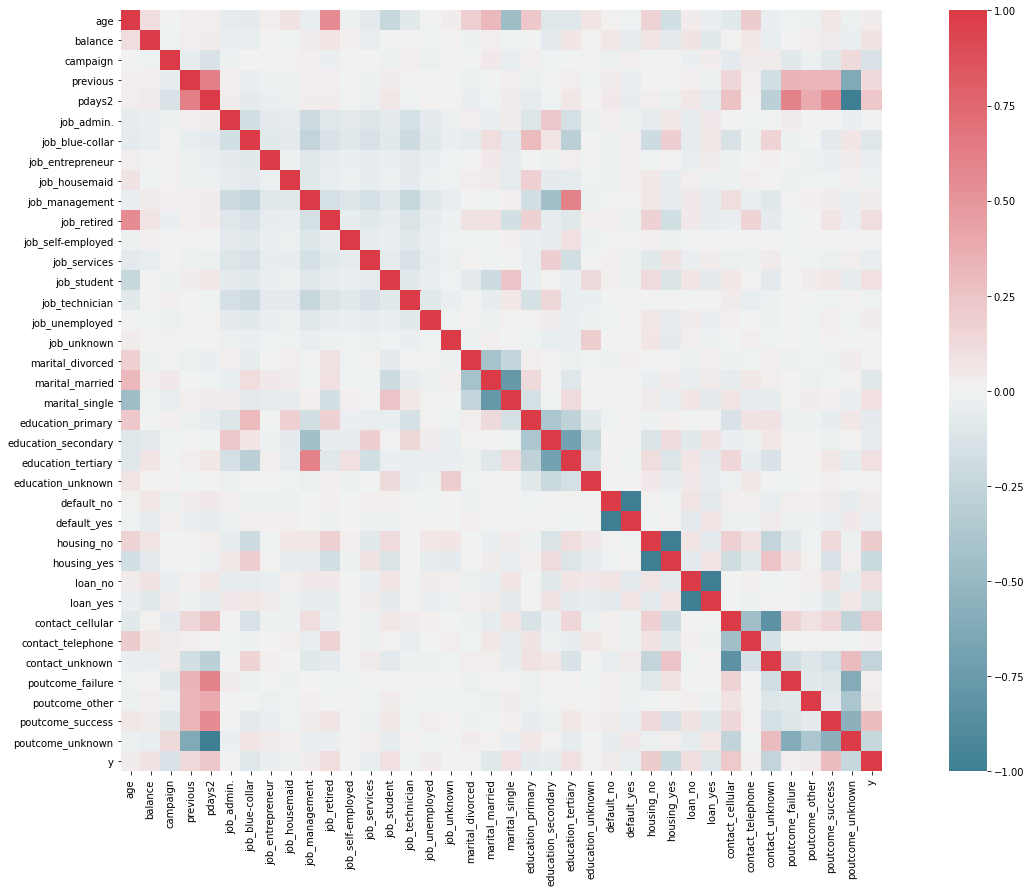

In [38]:
# Matrice de corrélation 
f, ax = plt.subplots(figsize=(24, 14))
corr = data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),square=True, ax=ax)
plt.savefig('matrice_correlation2')

### Suppression des variables fortement corrélées


In [39]:
# Valeur absolu de la matrice
corr = data.corr().abs()

#triangle supérieur de la matrice de corrélation
upper_tri = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))

# Colonnes avec une corrélation supérieure à 0,5
var_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.5)]

# Variables à supprimer
print("Les colonnes à supprimer:")
for i in var_drop:
    print(i)

# Supprimer les variables
#data.drop(data[var_drop], axis=1)
data = data.drop(data[var_drop], axis=1)

Les colonnes à supprimer:
pdays2
job_retired
marital_single
education_tertiary
default_yes
housing_yes
loan_yes
contact_unknown
poutcome_failure
poutcome_success
poutcome_unknown


In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  11162 non-null  int64
 1   balance              11162 non-null  int64
 2   campaign             11162 non-null  int64
 3   previous             11162 non-null  int64
 4   job_admin.           11162 non-null  uint8
 5   job_blue-collar      11162 non-null  uint8
 6   job_entrepreneur     11162 non-null  uint8
 7   job_housemaid        11162 non-null  uint8
 8   job_management       11162 non-null  uint8
 9   job_self-employed    11162 non-null  uint8
 10  job_services         11162 non-null  uint8
 11  job_student          11162 non-null  uint8
 12  job_technician       11162 non-null  uint8
 13  job_unemployed       11162 non-null  uint8
 14  job_unknown          11162 non-null  uint8
 15  marital_divorced     11162 non-null  uint8
 16  marital_married      1

In [41]:
# Copie de la dataset après encodage -> On l'utilisera pour déterminer les variables importantes
data_2 = data.copy()

In [42]:
data_2

,age,balance,campaign,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,education_primary,education_secondary,education_unknown,default_no,housing_no,loan_no,contact_cellular,contact_telephone,poutcome_other,y
0,59,2343,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,1
1,56,45,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,1,0,0,0,1
2,41,1270,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,0,0,1
3,55,2476,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,1
4,54,184,2,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0,0,0
11158,39,733,4,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,1,1,0,0,0,0
11159,32,29,2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,1,1,0,0,0
11160,43,0,2,5,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,1,0,1,0,0,0


In [43]:
data

,age,balance,campaign,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,education_primary,education_secondary,education_unknown,default_no,housing_no,loan_no,contact_cellular,contact_telephone,poutcome_other,y
0,59,2343,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,1
1,56,45,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,1,0,0,0,1
2,41,1270,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,0,0,1
3,55,2476,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,1
4,54,184,2,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0,0,0
11158,39,733,4,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,1,1,0,0,0,0
11159,32,29,2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,1,1,0,0,0
11160,43,0,2,5,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,1,0,1,0,0,0


### Les Variables dependantes

In [44]:
X = data.iloc[:, 0:26]

In [45]:
X

,age,balance,campaign,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,education_primary,education_secondary,education_unknown,default_no,housing_no,loan_no,contact_cellular,contact_telephone,poutcome_other
0,59,2343,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0
1,56,45,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,1,0,0,0
2,41,1270,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,0,0
3,55,2476,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0
4,54,184,2,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0,0
11158,39,733,4,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,1,1,0,0,0
11159,32,29,2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,1,1,0,0
11160,43,0,2,5,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,1,0,1,0,0


### La variable independante

In [46]:
y = data.iloc[:, 26]

In [47]:
y

0        1
1        1
2        1
3        1
4        1
        ..
11157    0
11158    0
11159    0
11160    0
11161    0
Name: y, Length: 11162, dtype: int64

## Standardiation des données, Changement d'echelle
### retrait de la moyenne, et division par ecart-type


In [48]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_X.fit(X)
X =sc_X.transform(X)

In [49]:
X

array([[ 1.49150488,  0.25252514, -0.55416834, ..., -1.6054794 ,
        -0.27296346, -0.22481365],
       [ 1.23967567, -0.4599736 , -0.55416834, ..., -1.6054794 ,
        -0.27296346, -0.22481365],
       [-0.0194704 , -0.0801603 , -0.55416834, ..., -1.6054794 ,
        -0.27296346, -0.22481365],
       ...,
       [-0.77495804, -0.46493443, -0.18678537, ...,  0.62286691,
        -0.27296346, -0.22481365],
       [ 0.14841574, -0.47392593, -0.18678537, ...,  0.62286691,
        -0.27296346, -0.22481365],
       [-0.6070719 , -0.47392593, -0.55416834, ...,  0.62286691,
        -0.27296346, -0.22481365]])

## Apprentissage supervisé

In [50]:
# Split data
from sklearn.model_selection import train_test_split

In [51]:
# division du dataset en train et test
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.2, random_state = 100)

In [52]:
# Les Metriques
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import f1_score

### Models : Logistic Regression, Decision Tree, Naive Bayes, ANN(Perceptron), KNN

In [53]:
import time


from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Perceptron

#### Instanciation des differents classifiers avec les paramètres par défaut

In [54]:
# dictionnaire des classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": tree.DecisionTreeClassifier(),
    "Naive Bayes": GaussianNB(),
    "Nearest Neighbors": KNeighborsClassifier(),
    "Perceptron": Perceptron()   
}

#### Classifiers avec Paramètres differents

In [55]:
'''
# dictionnaire des classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": tree.DecisionTreeClassifier(criterion='gini',max_depth=10,random_state=100,min_samples_leaf=10),
    "Naive Bayes": GaussianNB(),
    "Nearest Neighbors": KNeighborsClassifier(),
    "Perceptron": Perceptron(alpha=0.07,max_iter=100, random_state=100,penalty='l1')   
}


'''


'\n# dictionnaire des classifiers\nclassifiers = {\n    "Logistic Regression": LogisticRegression(),\n    "Decision Tree": tree.DecisionTreeClassifier(criterion=\'gini\',max_depth=10,random_state=100,min_samples_leaf=10),\n    "Naive Bayes": GaussianNB(),\n    "Nearest Neighbors": KNeighborsClassifier(),\n    "Perceptron": Perceptron(alpha=0.07,max_iter=100, random_state=100,penalty=\'l1\')   \n}\n\n\n'

In [56]:
# Dictionnaires pour sauvegarder les metriques pour les differents classifiers
accuracies = {}
kappaScores = {}
f1scores = {}
trainScores = {}
trainingTimes = {}

<><><><><><><><><><><><><><><><><><><><>
           Logistic Regression
<><><><><><><><><><><><><><><><><><><><>
 les principales Metriques de classification:
               precision    recall  f1-score   support

           0       0.68      0.67      0.67      1176
           1       0.64      0.64      0.64      1057

    accuracy                           0.66      2233
   macro avg       0.66      0.66      0.66      2233
weighted avg       0.66      0.66      0.66      2233

Logistic Regression Train accuracy: 67.09597939298914
Logistic Regression Test accuracy: 65.64999999999999
F1-Score:  63.871879415920866
Cohen Kappa score:  31.13719198998044


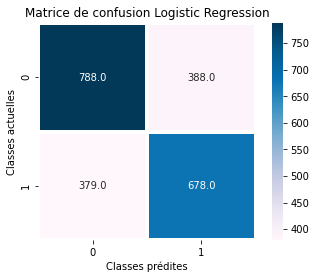

<><><><><><><><><><><><><><><><><><><><>
           Decision Tree
<><><><><><><><><><><><><><><><><><><><>
 les principales Metriques de classification:
               precision    recall  f1-score   support

           0       0.61      0.61      0.61      1176
           1       0.57      0.57      0.57      1057

    accuracy                           0.59      2233
   macro avg       0.59      0.59      0.59      2233
weighted avg       0.59      0.59      0.59      2233

Decision Tree Train accuracy: 99.95520215029678
Decision Tree Test accuracy: 58.98
F1-Score:  56.87382297551788
Cohen Kappa score:  17.76360596867067


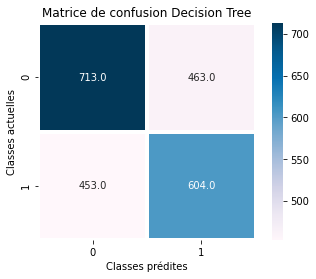

<><><><><><><><><><><><><><><><><><><><>
           Naive Bayes
<><><><><><><><><><><><><><><><><><><><>
 les principales Metriques de classification:
               precision    recall  f1-score   support

           0       0.66      0.64      0.65      1176
           1       0.61      0.63      0.62      1057

    accuracy                           0.64      2233
   macro avg       0.63      0.63      0.63      2233
weighted avg       0.64      0.64      0.64      2233

Naive Bayes Train accuracy: 64.65449658416395
Naive Bayes Test accuracy: 63.5
F1-Score:  62.14584300975383
Cohen Kappa score:  26.93253516574624


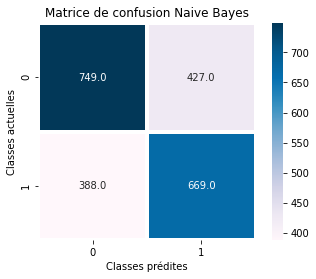

<><><><><><><><><><><><><><><><><><><><>
           Nearest Neighbors
<><><><><><><><><><><><><><><><><><><><>
 les principales Metriques de classification:
               precision    recall  f1-score   support

           0       0.64      0.68      0.66      1176
           1       0.61      0.58      0.60      1057

    accuracy                           0.63      2233
   macro avg       0.63      0.63      0.63      2233
weighted avg       0.63      0.63      0.63      2233

Nearest Neighbors Train accuracy: 75.61877029902566
Nearest Neighbors Test accuracy: 62.88
F1-Score:  59.54123962908737
Cohen Kappa score:  25.30624465113389


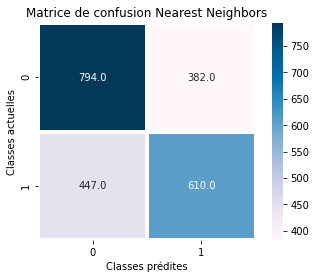

<><><><><><><><><><><><><><><><><><><><>
           Perceptron
<><><><><><><><><><><><><><><><><><><><>
 les principales Metriques de classification:
               precision    recall  f1-score   support

           0       0.56      0.60      0.58      1176
           1       0.52      0.49      0.50      1057

    accuracy                           0.54      2233
   macro avg       0.54      0.54      0.54      2233
weighted avg       0.54      0.54      0.54      2233

Perceptron Train accuracy: 54.720573412476206
Perceptron Test accuracy: 54.37
F1-Score:  50.21983390327309
Cohen Kappa score:  8.178230742938819


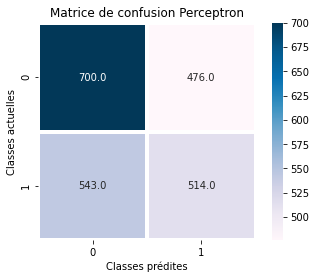

In [57]:
def training_models(X_train, y_train):
    '''
    Fonction pour entrainer les differents modèles et reporter les metriques.
    
    '''
    symbole1 = "<>"
    symbole2 = " "
    for key, classifier in classifiers.items():
        print(20*symbole1)
        print(symbole2*10 ,key)
        print(20*symbole1)
        # Temps Debut de l'entrainement
        time_start = time.clock() 

        # Entrainement du modèle
        classifier.fit(X_train,y_train)

        # Temps Fin de l'entrainement
        time_end = time.clock() 

        # Durée de l'entrainement
        training_duration = time_end - time_start
        trainingTimes[key] = training_duration
        
        # Prédiction sur les données de test
        prediction = classifier.predict(X_test)

        print(" les principales Metriques de classification:\n", classification_report(y_test,prediction))

        # Précison sur les données d'entrainement
        train_score = classifier.score(X_train, y_train) * 100 
        print("{Key} Train accuracy: {train_score}".format(Key=key, train_score=train_score))
        trainScores[key] = train_score

        # Précison sur les données de test
        acc_score_arrondie = round(accuracy_score(y_test, prediction), 4)

        acc_score = acc_score_arrondie * 100 # Valeur en pourcentage

        print("{Key} Test accuracy: {acc_score}".format(Key=key, acc_score=acc_score))
        accuracies[key] = acc_score

        # F1 score
        f1score = f1_score(y_test, prediction)*100
        print("F1-Score: ", f1score)
        f1scores[key] = f1score

        # Cohen kappa
        cohen_kappa = cohen_kappa_score(y_test, prediction)*100
        print('Cohen Kappa score: ', cohen_kappa)
        kappaScores[key] = cohen_kappa
        
        # Matrice de confusion
        cm = confusion_matrix(y_test, prediction)
        sns.heatmap(cm, annot=True, fmt=".1f", linewidths=3, square=True, cmap='PuBu', color="#cd1076")
        plt.ylabel('Classes actuelles')
        plt.xlabel('Classes prédites')
        plt.title('Matrice de confusion {a}'.format(a=key),size=12)
        plt.show()
        
        if key == "Decision Tree":
            model_dtree = classifier.fit(X_train,y_train)
        elif key == "Logistic Regression":
            model_lr = classifier.fit(X_train,y_train)
    return model_dtree, model_lr
        
model_dtree, model_lr = training_models(X_train, y_train)

## Comparaison des differents modèles

In [58]:
colors = ["red", "blue", "pink", "green","black"]

### Durée d'entrainement

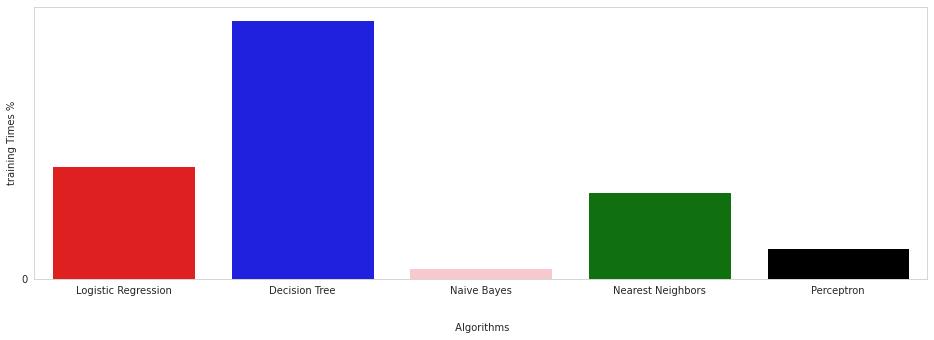

In [59]:
sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0, 100, 2))
plt.ylabel("training Times %")
plt.xlabel("\n\n Algorithms")
sns.barplot(x=list(trainingTimes.keys()), y=list(trainingTimes.values()), palette=colors)
#plt.savefig('training Times')
plt.show()

### Training accuracy

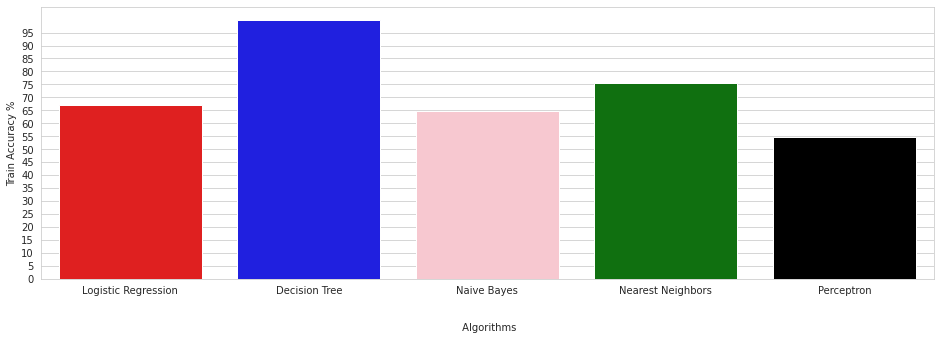

In [60]:
sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,5))
plt.ylabel("Train Accuracy %")
plt.xlabel("\n\n Algorithms")
sns.barplot(x=list(trainScores.keys()), y=list(trainScores.values()), palette=colors)
plt.savefig('Train_accuracy')
plt.show()

### Test accuracy

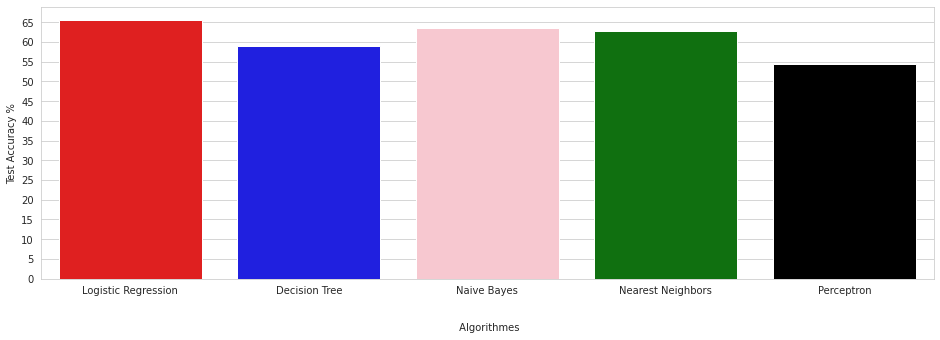

In [61]:
sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,5))
plt.ylabel("Test Accuracy %")
plt.xlabel("\n\n Algorithmes")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
#plt.savefig('accuracy')
plt.show()

### Kappa Scores

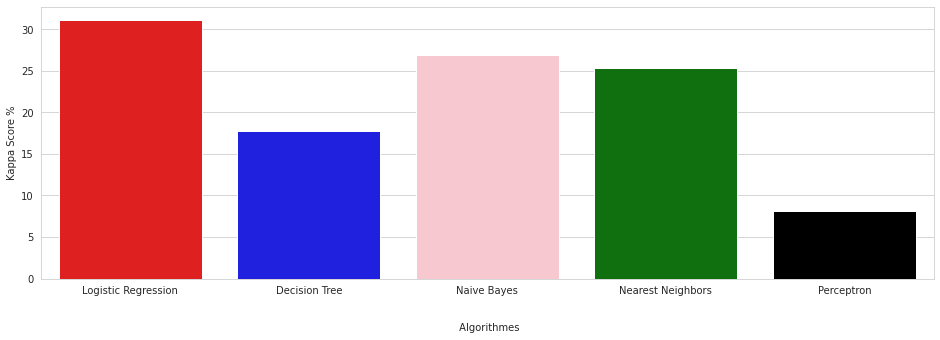

In [62]:
sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,5))
plt.ylabel("Kappa Score %")
plt.xlabel("\n\n Algorithmes")
sns.barplot(x=list(kappaScores.keys()), y=list(kappaScores.values()), palette=colors)
#plt.savefig('kappa')
plt.show()

### F1 Scores

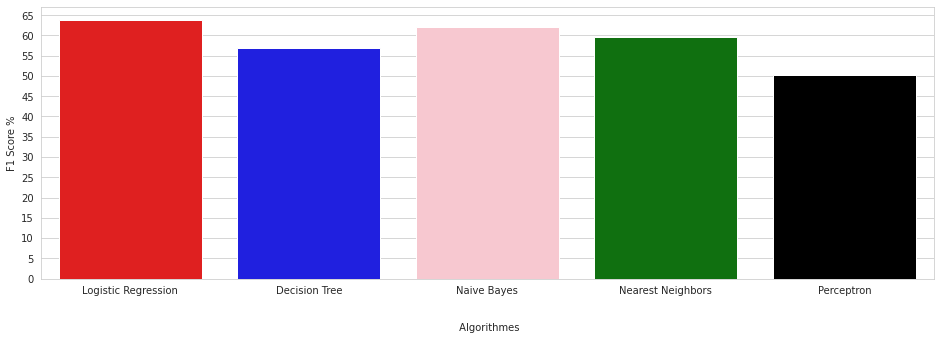

In [63]:
sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,5))
plt.ylabel("F1 Score %")
plt.xlabel("\n\n Algorithmes")
sns.barplot(x=list(f1scores.keys()), y=list(f1scores.values()), palette=colors)
#plt.savefig('f1')
plt.show()

## Importance des variables

### Regression Logistic

In [64]:
def plot_feature_importance(features_importance):
    fig, (ax2) = plt.subplots(nrows=1, ncols=1, figsize=(24,8))
    plt.title("Importance des variables", fontsize=18)
    num_bar = min(len(features_importance.index), 25)
    ax2.barh(np.arange(0, num_bar), features_importance['importance'][:num_bar], align='center', alpha=0.5)
    ax2.set_yticks(np.arange(0, num_bar))
    ax2.set_yticklabels(features_importance['feature'][:num_bar])
    #plt.savefig('features_Importance')
    plt.show()

In [65]:
features_importance = pd.DataFrame({'feature': data_2.drop('y', axis=1).columns, 'importance': model_lr.coef_[0]}).sort_values(by='importance', ascending=False)
features_importance = features_importance.reset_index()
pd.set_option('display.max_rows',features_importance.shape[0]+1)
print(features_importance)

    index              feature  importance
0      23     contact_cellular    0.476431
1      21           housing_no    0.281658
2       3             previous    0.259567
3      24    contact_telephone    0.218972
4      22              loan_no    0.176081
5       1              balance    0.116958
6      20           default_no    0.033340
7      11          job_student    0.029071
8       0                  age    0.021686
9      15     marital_divorced   -0.025222
10     19    education_unknown   -0.037354
11     14          job_unknown   -0.053288
12     13       job_unemployed   -0.057027
13     25       poutcome_other   -0.060820
14     18  education_secondary   -0.099032
15      9    job_self-employed   -0.127143
16      7        job_housemaid   -0.136652
17     17    education_primary   -0.138888
18      6     job_entrepreneur   -0.140218
19     16      marital_married   -0.144482
20      4           job_admin.   -0.157484
21     10         job_services   -0.191659
22      5  

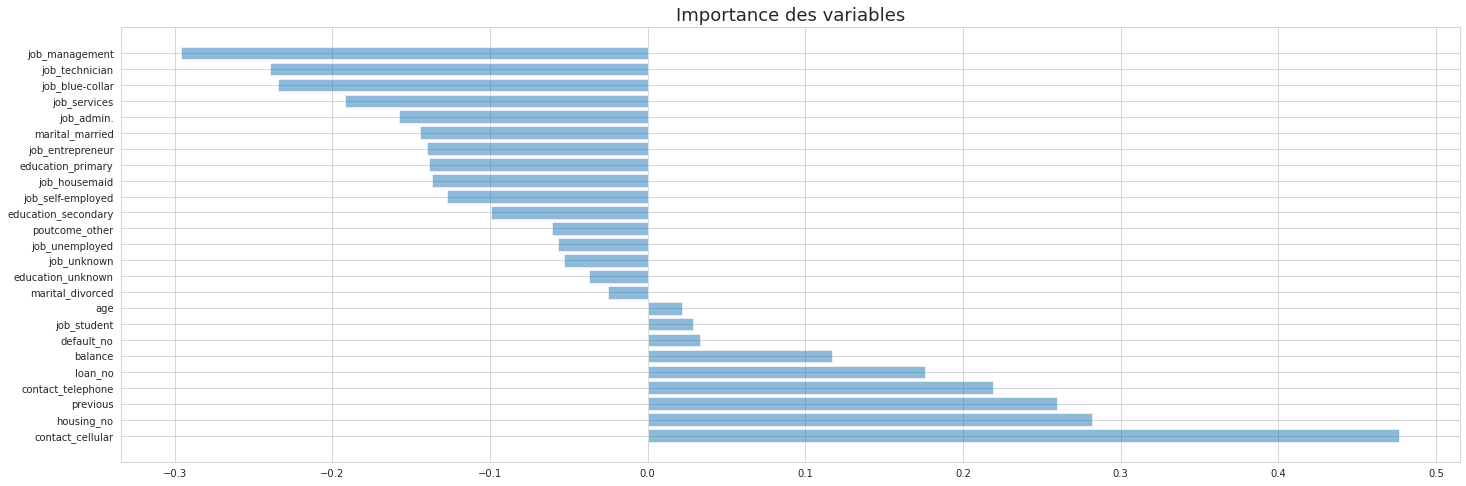

In [66]:
plot_feature_importance(features_importance)

### Arbre de decision

In [67]:
features_importance = pd.DataFrame({'feature': data_2.drop('y', axis=1).columns, 'importance': model_dtree.feature_importances_}).sort_values(by='importance', ascending=False)
features_importance = features_importance.reset_index()
pd.set_option('display.max_rows',features_importance.shape[0]+1)
print(features_importance)

    index              feature  importance
0       1              balance    0.297040
1       0                  age    0.210139
2       3             previous    0.080147
3       2             campaign    0.079296
4      21           housing_no    0.043892
5      23     contact_cellular    0.033685
6      18  education_secondary    0.028738
7       5      job_blue-collar    0.022490
8      16      marital_married    0.022379
9       8       job_management    0.021948
10     22              loan_no    0.017571
11     12       job_technician    0.017479
12     17    education_primary    0.016985
13     10         job_services    0.016329
14      4           job_admin.    0.014636
15     15     marital_divorced    0.013637
16      9    job_self-employed    0.011699
17     19    education_unknown    0.008619
18      6     job_entrepreneur    0.008613
19     13       job_unemployed    0.007792
20     25       poutcome_other    0.006859
21      7        job_housemaid    0.006790
22     20  

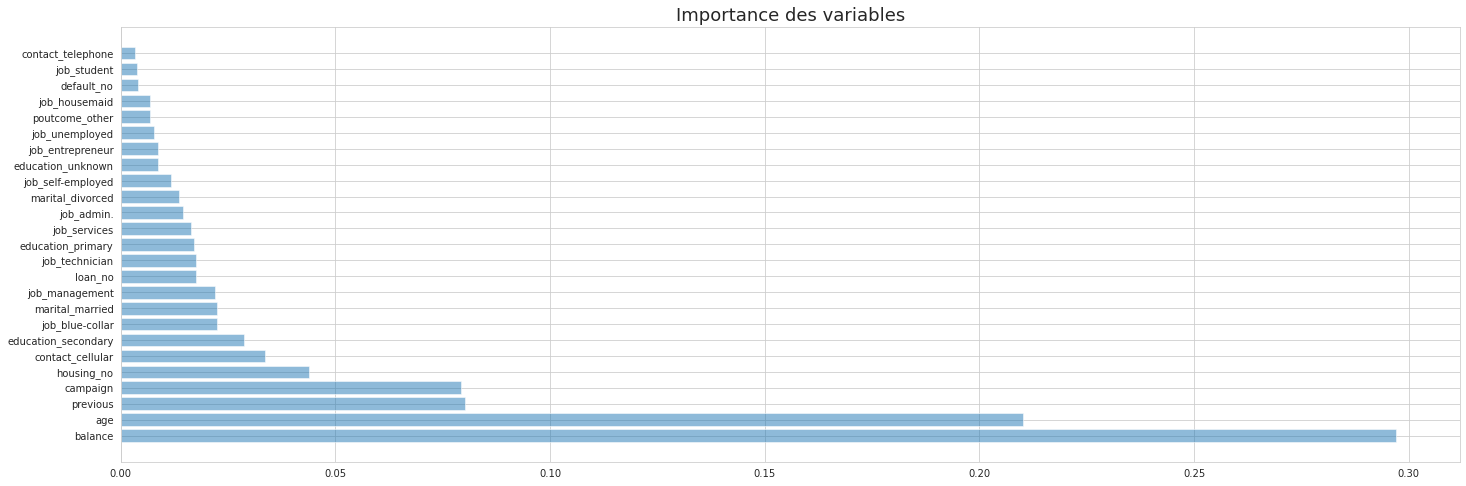

In [68]:
plot_feature_importance(features_importance)

## Validation croisée

In [70]:
from sklearn.model_selection import cross_val_score

### Cross validation on training set

In [71]:
# KNearestNeighbors
knn_clf = KNeighborsClassifier()
knn_scores = cross_val_score(knn_clf, X_train, y_train, cv=3)
knn_mean = knn_scores.mean()

# Decision Tree
tree_clf = tree.DecisionTreeClassifier()
tree_scores = cross_val_score(tree_clf, X_train, y_train, cv=3)
tree_mean = tree_scores.mean()

# Logistic Regression
lr_clf = LogisticRegression()
lr_scores = cross_val_score(lr_clf, X_train, y_train, cv=3)
lr_mean = lr_scores.mean()


# Naives Bayes
nav_clf = GaussianNB()
nav_scores = cross_val_score(nav_clf, X_train, y_train, cv=3)
nav_mean = nav_scores.mean()


# Perceptron
percp_clf = Perceptron() 
percp_scores = cross_val_score(percp_clf, X_train, y_train, cv=3)
percp_mean = percp_scores.mean()


# Create a Dataframe with the results.
d = {'Classifiers': ['Nearest Neighbors', 'Decision Tree', 'Naives Bayes', 'Logistic Regression', 'Perceptron'], 
    'Crossval Mean Scores': [knn_mean, tree_mean, lr_mean, nav_mean, percp_mean]}
result_df = pd.DataFrame(data=d)

In [72]:
# Perfermance modele
result_df = result_df.sort_values(by=['Crossval Mean Scores'], ascending=False)
result_df

,Classifiers,Crossval Mean Scores
2,Naives Bayes,0.668497
3,Logistic Regression,0.643074
0,Nearest Neighbors,0.632882
1,Decision Tree,0.592899
4,Perceptron,0.584834


#    ------------------------------------------------------------------------------------------------------